In [3]:
import pandas as pd
diabetes=pd.read_csv("diabetic_data.csv")

In [4]:
diabetes.shape

(101765, 50)

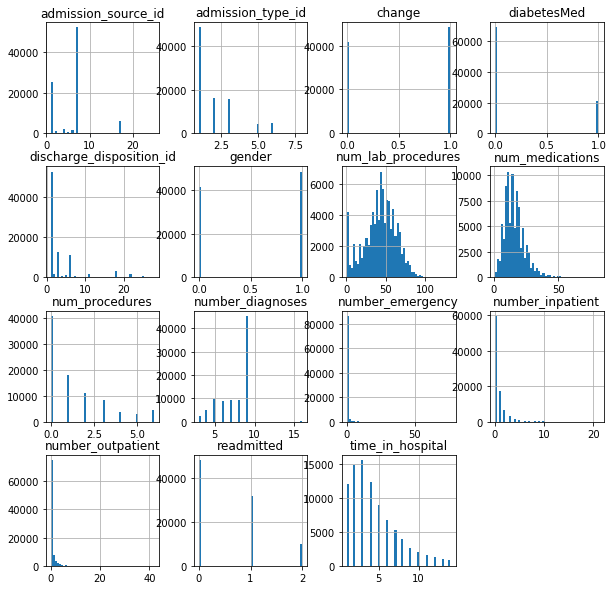

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50, figsize=(10,10))
plt.show()

In [5]:
iabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101765 entries, 0 to 101764
Data columns (total 50 columns):
encounter_id                101765 non-null int64
patient_nbr                 101765 non-null int64
race                        101765 non-null object
gender                      101765 non-null object
age                         101765 non-null object
weight                      101765 non-null object
admission_type_id           101765 non-null int64
discharge_disposition_id    101765 non-null int64
admission_source_id         101765 non-null int64
time_in_hospital            101765 non-null int64
payer_code                  101765 non-null object
medical_specialty           101765 non-null object
num_lab_procedures          101765 non-null int64
num_procedures              101765 non-null int64
num_medications             101765 non-null int64
number_outpatient           101765 non-null int64
number_emergency            101765 non-null int64
number_inpatient            10176

In [6]:
diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
#There are 3 columns - "diag_1","diag_2","diag_3" which have Integer values but some rows have String vlaues. Since the String values are not huge in
#Number, we first replace all such values with "?", and then delete them.

diabetes=diabetes.replace({'diag_1': r'^V[0-9][0-9]'}, {'diag_1': '?'}, regex=True)
diabetes=diabetes.replace({'diag_2': r'^V[0-9][0-9]'}, {'diag_2': '?'}, regex=True)
diabetes=diabetes.replace({'diag_3': r'^V[0-9][0-9]'}, {'diag_3': '?'}, regex=True)
diabetes=diabetes.replace({'diag_1': r'^E[0-9][0=9][0-9]'}, {'diag_1': '?'}, regex=True)
diabetes=diabetes.replace({'diag_2': r'^E[0-9][0-9][0-9]'}, {'diag_2': '?'}, regex=True)
diabetes=diabetes.replace({'diag_3': r'^E[0-9][0-9][0-9]'}, {'diag_3': '?'}, regex=True)

In [8]:
diabetes.isin(['?']).sum(axis=0)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98568
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                       1666
diag_2                       2894
diag_3                       6481
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
diabetes = diabetes.drop(['weight','payer_code','medical_specialty'], axis=1)

In [10]:
#Dropping encounter_id and patient_nbr , these 2 are just identification numbers.
diabetes = diabetes.drop(['encounter_id','patient_nbr'], axis=1)

In [11]:
diabetes.shape

(101765, 45)

In [12]:
diabetes.isin(['?']).sum(axis=0)

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                      1666
diag_2                      2894
diag_3                      6481
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [13]:
diabetes = diabetes[diabetes.race != '?']
diabetes = diabetes[diabetes.diag_1 != '?']
diabetes = diabetes[diabetes.diag_2 != '?']
diabetes = diabetes[diabetes.diag_3 != '?']

In [14]:
diabetes.shape

(89781, 45)

In [15]:
diabetes.isin(['None']).sum(axis=0)

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               84973
A1Cresult                   74533
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [16]:
diabetes = diabetes.drop(['max_glu_serum','A1Cresult'], axis=1) # AS seen above most of the vlaues are None for these 2 columns.

In [17]:
diabetes.shape

(89781, 43)

In [18]:
diabetes.isin(['Unknown/Invalid']).sum(axis=0)

race                        0
gender                      1
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipto

In [19]:
diabetes["gender"].value_counts()

Female             48445
Male               41335
Unknown/Invalid        1
Name: gender, dtype: int64

In [20]:
#Since only 1 row with "Unknown/Invalid" we are deleting that row.
diabetes = diabetes[diabetes.gender != 'Unknown/Invalid']

In [21]:
diabetes["gender"].value_counts()

Female    48445
Male      41335
Name: gender, dtype: int64

In [22]:
diabetes["acetohexamide"].value_counts()

No        89779
Steady        1
Name: acetohexamide, dtype: int64

In [23]:
#Since only 1 row with "Steady " we are deleting that row.
diabetes = diabetes[diabetes.acetohexamide != 'Steady']

In [24]:
diabetes.loc[diabetes.gender=="Male","gender"] = 0

In [25]:
diabetes.loc[diabetes.gender=="Female","gender"] = 1

In [26]:
diabetes.loc[diabetes.change=="Ch","change"] = 0

In [27]:
diabetes.loc[diabetes.change=="No","change"] = 1

In [28]:
diabetes.loc[diabetes.diabetesMed=="Yes", "diabetesMed"]=0

In [29]:
diabetes.loc[diabetes.diabetesMed=="No", "diabetesMed"]=1

In [30]:
diabetes.loc[diabetes.readmitted=="NO","readmitted"]=0

In [31]:
diabetes.loc[diabetes.readmitted==">30","readmitted"]=1

In [32]:
diabetes.loc[diabetes.readmitted=="<30","readmitted"]=2

In [61]:
diabetes.shape

(89779, 43)

In [59]:
diabetes.corr().readmitted.sort_values(ascending=False)

readmitted                  1.000000
number_inpatient            0.230154
number_emergency            0.100794
number_diagnoses            0.099412
number_outpatient           0.066864
time_in_hospital            0.057066
num_medications             0.048010
num_lab_procedures          0.036149
admission_source_id         0.030095
gender                      0.013215
discharge_disposition_id    0.007165
admission_type_id          -0.010172
num_procedures             -0.038348
change                     -0.042361
diabetesMed                -0.058465
Name: readmitted, dtype: float64

In [33]:
diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,1,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,0,0,1
3,Caucasian,0,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,0,0,0
4,Caucasian,0,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,0,0,0
5,Caucasian,0,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,1,0,1
7,Caucasian,0,[70-80),1,1,7,5,73,0,12,...,No,No,No,No,No,No,No,1,0,1


In [34]:
from sklearn.model_selection import train_test_split
diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.2, random_state=42)

In [35]:
from future_encoders import ColumnTransformer
from future_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
cat_attribs = ["race","age","metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]
num_attribs = ["admission_type_id", "discharge_disposition_id", "admission_source_id", "time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]


full_pipeline = ColumnTransformer([("cat_X", OneHotEncoder(), cat_attribs),
                                  ("num", StandardScaler(), num_attribs),
                                  ])

In [36]:
diabetes_train_X=diabetes_train.drop(["readmitted"], axis=1)
diabetes_train_X.shape

(71823, 42)

In [37]:
diabetes_train_Y=diabetes_train["readmitted"].copy()

In [38]:
diabetes_train_Y.shape

(71823,)

In [39]:
diabetes_train_X_prepared = full_pipeline.fit_transform(diabetes_train_X)

In [40]:
diabetes_train_X.shape

(71823, 42)

In [41]:
diabetes_train_X_prepared.shape

(71823, 94)

In [42]:
diabetes_test_X=diabetes_test.drop(["readmitted"], axis=1)

In [43]:
diabetes_test_Y=diabetes_test["readmitted"].copy()

In [44]:
diabetes_test_X.columns.tolist()

#diabetes.loc[diabetes.glipizide=="Steady", "glipizide"]
#glimepiride-pioglitazone was only 1 rown in train and none in TEst

#metformin-rosiglitazone
#diabetes_test_X.loc[diabetes['metformin-pioglitazone'] == 'Steady']
#diabetes_train_X.loc[diabetes['metformin-pioglitazone'] == 'Steady']

#diabetes_test_X = diabetes_test_X[diabetes_test_X.'metformin-pioglitazone' != 'Steady']

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [45]:
diabetes_test_X_prepared=full_pipeline.transform(diabetes_test_X)

In [46]:
print(diabetes_test_X_prepared.shape)
print(diabetes_train_X_prepared.shape)

(17956, 94)
(71823, 94)


In [47]:
import numpy as np
from sklearn.linear_model import SGDClassifier

In [49]:
#A loss is hinge this is Linear SVM Classifier.
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import warnings
warnings.filterwarnings("ignore")
loss_l = []
for i in [0.00001,0.0001,0.001, 0.01, 0.1,1, 10, 100]:
    for j in ['l1','l2']:
        clf_logis=SGDClassifier(alpha=i, penalty=j, class_weight='balanced', loss='hinge')
        clf_logis.fit(diabetes_train_X_prepared,diabetes_train_Y)
        cal_clf = CalibratedClassifierCV(clf_logis, cv=2, method='isotonic')
        cal_clf.fit(diabetes_train_X_prepared,diabetes_train_Y)
        pred = cal_clf.predict(diabetes_test_X_prepared)
        pred_proba = cal_clf.predict_proba(diabetes_test_X_prepared)
        loss_l.append(log_loss(diabetes_test_Y, pred_proba))
        print(i,":", log_loss(diabetes_test_Y, pred_proba), ":", j) 
        print("="*50)
print(min(loss_l))

1e-05 : 0.9311192426681443 : l1
1e-05 : 0.931735959923532 : l2
0.0001 : 0.914511537161552 : l1
0.0001 : 0.9287102656459219 : l2
0.001 : 0.9278446161832902 : l1
0.001 : 0.9203811775800465 : l2
0.01 : 0.9364765284982964 : l1
0.01 : 0.9152210734834568 : l2
0.1 : 0.9427266745840035 : l1
0.1 : 0.9133880350860096 : l2
1 : 0.949065905612342 : l1
1 : 0.9183400511242505 : l2
10 : 0.949065905612342 : l1
10 : 0.9183075001694346 : l2
100 : 0.949065905612342 : l1
100 : 0.9199483502390144 : l2
0.9133880350860096


In [50]:
#This is for Logistic REgression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import warnings
warnings.filterwarnings("ignore")
loss_l = []
for i in [0.00001,0.0001,0.001, 0.01, 0.1,1, 10, 100]:
    for j in ['l1','l2']:
        clf_logis=SGDClassifier(alpha=i, penalty=j, class_weight='balanced', loss='log')
        clf_logis.fit(diabetes_train_X_prepared,diabetes_train_Y)
        cal_clf = CalibratedClassifierCV(clf_logis, cv=2, method='isotonic')
        cal_clf.fit(diabetes_train_X_prepared,diabetes_train_Y)
        pred = cal_clf.predict(diabetes_test_X_prepared)
        pred_proba = cal_clf.predict_proba(diabetes_test_X_prepared)
        loss_l.append(log_loss(diabetes_test_Y, pred_proba))
        print(i,":", log_loss(diabetes_test_Y, pred_proba), ":", j) 
        print("="*50)
print(min(loss_l))

1e-05 : 0.9223260119775527 : l1
1e-05 : 0.9331476983944564 : l2
0.0001 : 0.9210828719684622 : l1
0.0001 : 0.9222959954450373 : l2
0.001 : 0.9099720400950431 : l1
0.001 : 0.9098802053909811 : l2
0.01 : 0.9150840034463392 : l1
0.01 : 0.9087790658480437 : l2
0.1 : 0.949065905612342 : l1
0.1 : 0.909946393641829 : l2
1 : 0.949065905612342 : l1
1 : 0.9119012984160256 : l2
10 : 0.949065905612342 : l1
10 : 0.9136118514276447 : l2
100 : 0.949065905612342 : l1
100 : 0.9186158611020951 : l2
0.9087790658480437


In [51]:
#Decision Tree Classifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(random_state=0)
dec_clf.fit(diabetes_train_X_prepared,diabetes_train_Y)
#cross_val_score(dec_clf, iris.data, iris.target, cv=2)
cal_clf = CalibratedClassifierCV(dec_clf, cv=2, method='isotonic')
cal_clf.fit(diabetes_train_X_prepared,diabetes_train_Y)
pred = cal_clf.predict(diabetes_test_X_prepared)
pred_proba = cal_clf.predict_proba(diabetes_test_X_prepared)
log_loss(diabetes_test_Y, pred_proba)

0.9390054162471347

In [53]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
        sig_clf_probs = sig_clf.predict_proba(diabetes_test_X_prepared)
        cv_log_error_array.append(log_loss(diabetes_test_Y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(diabetes_test_Y, sig_clf_probs))
    
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(diabetes_train_X_prepared, diabetes_train_Y)

predict_y = sig_clf.predict_proba(diabetes_train_X_prepared)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(diabetes_train_Y, predict_y, labels=clf.classes_, eps=1e-15))
#predict_y = sig_clf.predict_proba(diabetes_test_X_prepared)
#print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(diabetes_test_X_prepared)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(diabetes_test_Y, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 0.9018846460060017
for n_estimators = 100 and max depth =  10
Log Loss : 0.8908544173186014
for n_estimators = 200 and max depth =  5
Log Loss : 0.9003511417601334
for n_estimators = 200 and max depth =  10
Log Loss : 0.8904435238957196
for n_estimators = 500 and max depth =  5
Log Loss : 0.8998462792923906
for n_estimators = 500 and max depth =  10
Log Loss : 0.8899160449735808
for n_estimators = 1000 and max depth =  5
Log Loss : 0.8999771358668818
for n_estimators = 1000 and max depth =  10
Log Loss : 0.8900457668600112
for n_estimators = 2000 and max depth =  5
Log Loss : 0.8998655435226967
for n_estimators = 2000 and max depth =  10
Log Loss : 0.8900378456374604
For values of best estimator =  500 The train log loss is: 0.8549703064539509
For values of best estimator =  500 The test log loss is: 0.8899160449762726


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

log_loss for c =  10 is 0.9032587009556714
log_loss for c =  50 is 0.8899868949311798
log_loss for c =  100 is 0.8852311910716022
log_loss for c =  500 is 0.8810300891251287
log_loss for c =  1000 is 0.8818875396345071
log_loss for c =  2000 is 0.8839059958496676


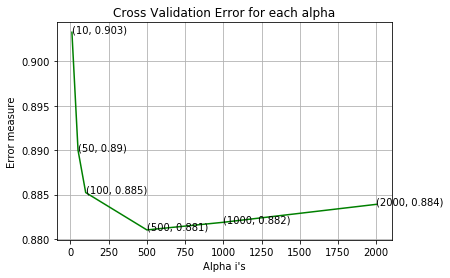

For values of best alpha =  500 The train log loss is: 0.8614868124336442
For values of best alpha =  500 The test log loss is: 0.8810300891251287
Number of misclassified points  41.93584317219871
-------------------------------------------------- Confusion matrix --------------------------------------------------


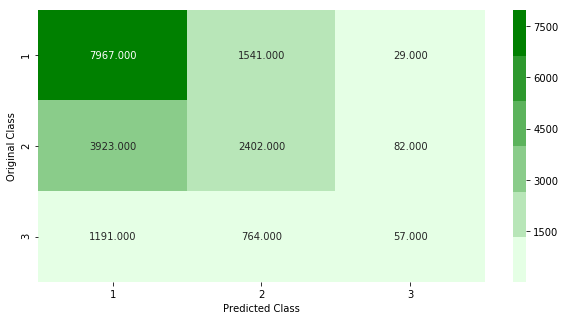

-------------------------------------------------- Precision matrix --------------------------------------------------


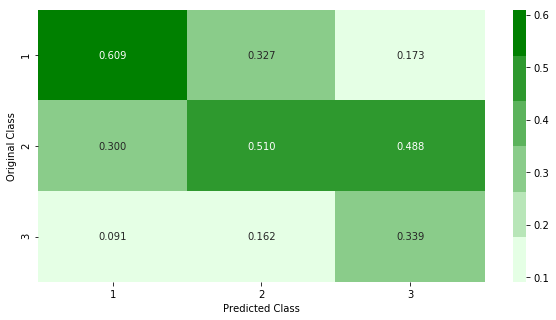

Sum of columns in precision matrix [1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


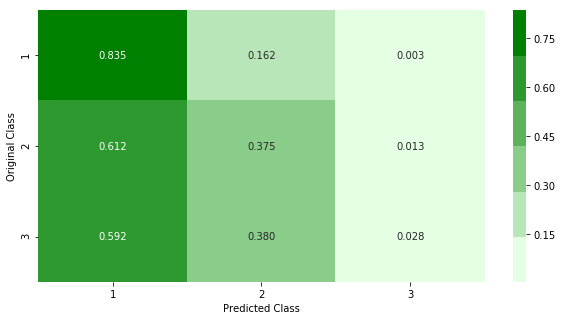

Sum of rows in precision matrix [1. 1. 1.]


In [58]:
#XGBOOST
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(diabetes_train_X_prepared,diabetes_train_Y)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
    predict_y = sig_clf.predict_proba(diabetes_test_X_prepared)
    cv_log_error_array.append(log_loss(diabetes_test_Y, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(diabetes_train_X_prepared,diabetes_train_Y)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
    
predict_y = sig_clf.predict_proba(diabetes_train_X_prepared)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(diabetes_train_Y, predict_y))
#predict_y = sig_clf.predict_proba(X_cv)
#print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(diabetes_test_X_prepared)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(diabetes_test_Y, predict_y))
plot_confusion_matrix(diabetes_test_Y, sig_clf.predict(diabetes_test_X_prepared))

In [56]:
from sklearn import metrics
print(metrics.accuracy_score(diabetes_test_Y, predict_y))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [65]:
# Random Forrest for feature selection

## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(diabetes_train_X, diabetes_train_Y) 
## And score it on your testing data.
rf.score(diabetes_test_X,diabetes_test_Y)

ValueError: could not convert string to float: 'No'

In [64]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_, index = diabetes_train_X_prepared.columns,columns=['importance']).sort_values('importance',ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
#Random Forrest
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
        sig_clf_probs = sig_clf.predict_proba(diabetes_test_X_prepared)
        cv_log_error_array.append(log_loss(diabetes_test_Y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(diabetes_test_Y, sig_clf_probs))
        
'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(diabetes_train_X_prepared, diabetes_train_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(diabetes_train_X_prepared, diabetes_train_Y)

predict_y = sig_clf.predict_proba(diabetes_train_X_prepared)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(diabetes_train_Y, predict_y, labels=clf.classes_, eps=1e-15))
#predict_y = sig_clf.predict_proba(diabetes_test_X_prepared)
#print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(diabetes_test_X_prepared)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(diabetes_test_Y, predict_y, labels=clf.classes_, eps=1e-15))

In [360]:
data_len = diabetes_test_X_prepared.shape[0]
cv_predicted_y = np.zeros((data_len,3))
for i in range(data_len):
    rand_probs = np.random.rand(1,3) #[1,2,3]=>[1/[6], 2/(1+2+3), 3/(1+2+3)]
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(diabetes_test_Y,cv_predicted_y, eps=1e-15))
# [0,inf]

Log loss on Cross Validation Data using Random Model 1.3517047554923023


In [335]:

from sklearn.metrics import log_loss

In [294]:
from sklearn.linear_model import LogisticRegression
clf_logis=LogisticRegression(penalty='l1', C=0.251188643150959); # 0.251188643150959
clf_logis.fit(diabetes_train_X_prepared,diabetes_train_Y)

LogisticRegression(C=0.251188643150959, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [268]:
#These are weight Vectors, don't quite know for now how do these come into play. Will think about these later.
#import numpy as np
#w=clf.coef_
#print(np.count_nonzero(w))

In [299]:
# make class predictions for the testing set
clf_logis_predictions = clf_logis.predict(diabetes_test_X_prepared)

In [300]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(diabetes_test_Y, clf_logis_predictions))

0.561260859879706


In [322]:
from sklearn.metrics import confusion_matrix
cm_logis = confusion_matrix(diabetes_test_Y, y_pred_class_logis) 
print(confusion_matrix(diabetes_test_Y, y_pred_class_logis) )
# 0 -> not admitted
#1 -> Admitted after 30 days
#2 -> Admitted within 30 days

[[8624  911    2]
 [4954 1448    5]
 [1461  545    6]]


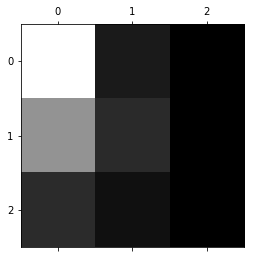

In [321]:
import matplotlib.pyplot as plt
plt.matshow(cm_logis, cmap=plt.cm.gray)
plt.show()

In [303]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
clf_gnb = GaussianNB().fit(diabetes_train_X_prepared, diabetes_train_Y)

In [304]:
clf_gnb_predictions = clf_gnb.predict(diabetes_test_X_prepared) 

print(clf_gnb_predictions.shape)

(17956,)


In [305]:
diabetes_test_Y.shape

(17956,)

In [306]:
print(metrics.accuracy_score(diabetes_test_Y, clf_gnb_predictions))

0.11957006014702606


In [307]:
from sklearn.metrics import confusion_matrix
cm_gnb = confusion_matrix(diabetes_test_Y, clf_gnb_predictions) 

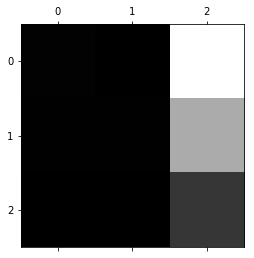

In [308]:
import matplotlib.pyplot as plt
plt.matshow(cm_gnb, cmap=plt.cm.gray)
plt.show()

In [309]:
#Applying KNN
from sklearn.neighbors import KNeighborsClassifier 
clf_knn = KNeighborsClassifier(n_neighbors = 3).fit(diabetes_train_X_prepared, diabetes_train_Y) 

In [311]:
clf_knn_predictions=clf_knn.predict(diabetes_test_X_prepared)

In [312]:
# accuracy on X_test 
#accuracy = knn.score(X_test, y_test) 
#print accuracy 

print(metrics.accuracy_score(diabetes_test_Y, clf_knn_predictions))

0.5186567164179104


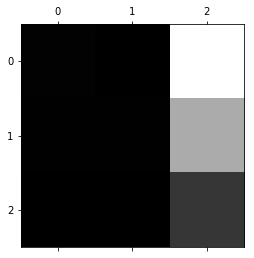

In [313]:
from sklearn.metrics import confusion_matrix
# creating a confusion matrix  
cm_knn = confusion_matrix(diabetes_test_Y, clf_knn_predictions) 

import matplotlib.pyplot as plt
plt.matshow(cm_gnb, cmap=plt.cm.gray)
plt.show()

In [316]:
#Applying SVM
#Linear SVM
from sklearn import svm
linsvm_clf = svm.LinearSVC()
linsvm_clf.fit(diabetes_train_X_prepared, diabetes_train_Y) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [319]:
linsvm_clf_predictions=linsvm_clf.predict(diabetes_test_X_prepared)

In [320]:
print(metrics.accuracy_score(diabetes_test_Y, linsvm_clf_predictions))

0.5583092002673201


In [ ]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]